In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv("data_cleaning.csv")
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,job_state,same_state,company_age,python_yn,rstudio_yn,spark_yn,aws_yn,excel_yn,nlp_yn,sql_yn
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,NM,0,47,1,0,0,0,1,0,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,MD,0,36,1,0,0,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,FL,1,10,1,0,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,WA,1,55,1,0,0,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,NY,1,22,1,0,0,0,1,0,1


In [4]:

def title_search(title):
    jobs = ["data scientist", "data engineer", "analyst", "manager", "director", "machine learning"]

    for job in jobs:
        if job in title.lower():
            return job

    return "na"

def seniority(title):
    title = title.lower()
    if "sr" in title or "senior" in title or "lead" in title or "principal" in title:
        return "senior"
    elif "jr" in title or "junior" in title or "jr." in title:
        return "junior"
    else:
        return "na"


In [5]:
#jobs title search

df["job_smp"] = df["Job Title"].apply(title_search)
df["job_smp"].value_counts()

data scientist      279
na                  184
data engineer       119
analyst             102
machine learning     22
manager              22
director             14
Name: job_smp, dtype: int64

In [6]:
#seniority

df["seniority"] = df["Job Title"].apply(seniority)
df["seniority"].value_counts()

na        519
senior    220
junior      3
Name: seniority, dtype: int64

In [7]:
# description length

df["desc_length"] = df["Job Description"].apply(lambda x: len(x))
df["desc_length"]

0      2555
1      4828
2      3495
3      3926
4      2748
       ... 
737    6219
738    6167
739    3107
740    1678
741    3710
Name: desc_length, Length: 742, dtype: int64

In [8]:
# Competitors count
df["num_com"] = df["Competitors"].apply(lambda x: len(x.split(","))  if x != "-1" else 0)
df["num_com"]

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_com, Length: 742, dtype: int64

In [9]:
# hourly wage to annual

df["min_salary"] = df.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary, axis=1)
df["max_salary"] = df.apply(lambda x: x.max_salary*2 if x.hourly == 1 else x.max_salary, axis=1)

In [10]:
df["company_txt"] = df["company_txt"].apply(lambda x: x.replace('\r\n', ""))
df["company_txt"].head()

0                        Tecolote Research
1    University of Maryland Medical System
2                                  KnowBe4
3                                     PNNL
4                       Affinity Solutions
Name: company_txt, dtype: object

In [11]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,rstudio_yn,spark_yn,aws_yn,excel_yn,nlp_yn,sql_yn,job_smp,seniority,desc_length,num_com
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,0,0,1,0,0,data scientist,na,2555,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,0,0,0,0,0,data scientist,na,4828,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,0,1,0,1,0,1,data scientist,na,3495,0
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,0,0,0,0,0,0,data scientist,na,3926,3
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,0,0,0,1,0,1,data scientist,na,2748,3


In [12]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avarage_salary,same_state,company_age,python_yn,rstudio_yn,spark_yn,aws_yn,excel_yn,nlp_yn,sql_yn,desc_length,num_com
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.0,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,0.528302,0.0,0.225067,0.237197,0.522911,0.053908,0.512129,3910.172507,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,0.499535,0.0,0.417908,0.425651,0.499812,0.225989,0.500190,1533.827777,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2834.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,3781.500000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,4772.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,10146.000000,4.000000


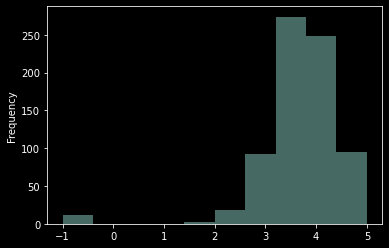

In [13]:

df.Rating.plot.hist(alpha=0.5)

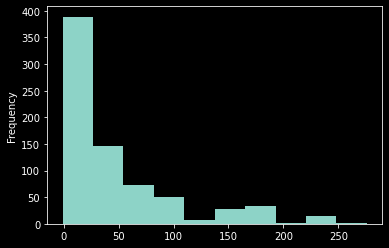

In [14]:
df.company_age.plot.hist()

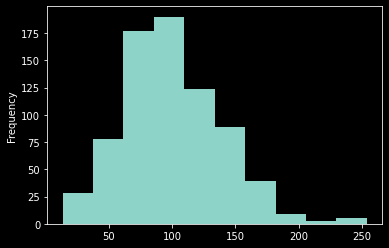

In [15]:
df.avarage_salary.plot.hist()

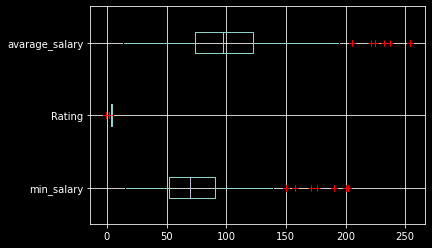

In [16]:
df.boxplot(column=["min_salary", "Rating", "avarage_salary"], vert=False, sym='r+')

In [17]:
cor = df[["avarage_salary", "company_age", "Rating", "desc_length", "num_com"]].corr()

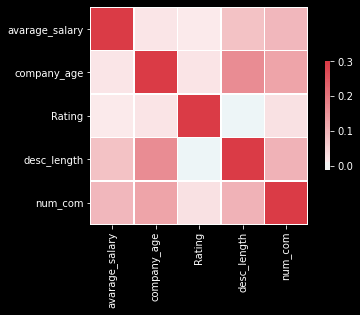

In [18]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)


sns.heatmap(cor, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [19]:
#categorical
df.columns


Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'avarage_salary', 'company_txt', 'job_state', 'same_state',
       'company_age', 'python_yn', 'rstudio_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'nlp_yn', 'sql_yn', 'job_smp', 'seniority', 'desc_length',
       'num_com'],
      dtype='object')

In [20]:
df_cat = df[['Size','Revenue', 'Type of ownership', 'Sector', 'same_state','job_smp', 'seniority', 'python_yn']]

grap_for Size: total = 9


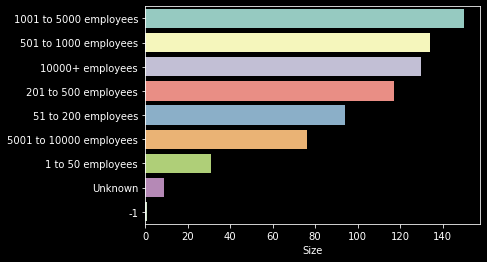

grap_for Revenue: total = 14


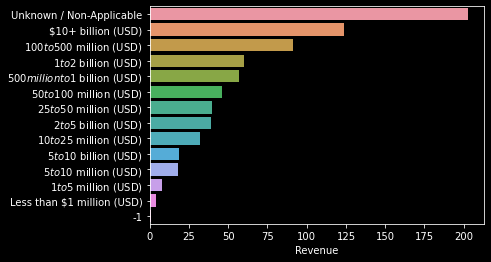

grap_for Type of ownership: total = 11


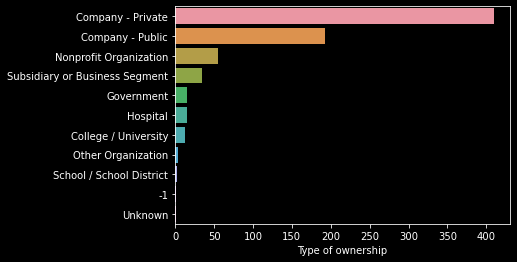

grap_for Sector: total = 25


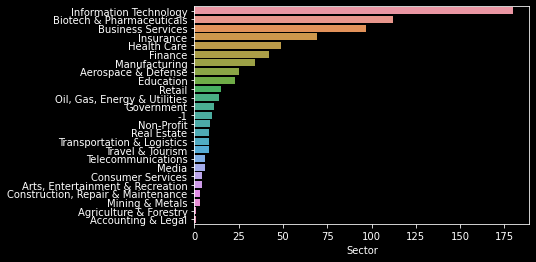

grap_for same_state: total = 2


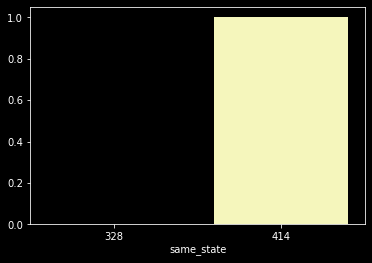

grap_for job_smp: total = 7


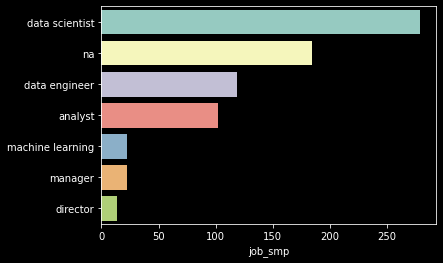

grap_for seniority: total = 3


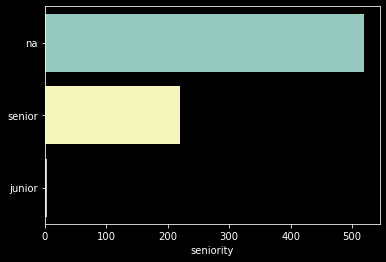

grap_for python_yn: total = 2


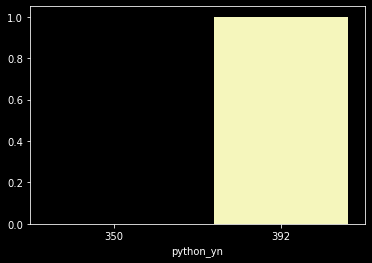

In [21]:
for category in df_cat.columns:
    cat_num = df_cat[category].value_counts()
    print("grap_for %s: total = %d"%(category, len(cat_num)))
    sns.barplot(x=cat_num, y=cat_num.index)
    plt.show()

grap_for Location: total = 20


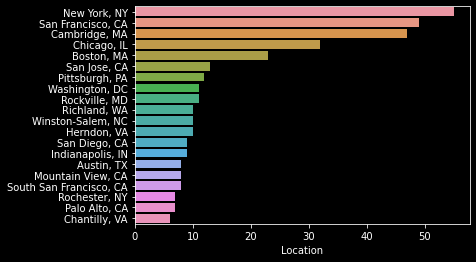

grap_for Headquarters: total = 20


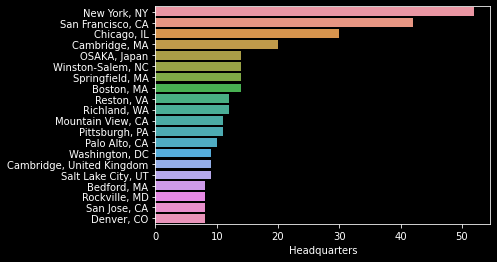

grap_for Industry: total = 20


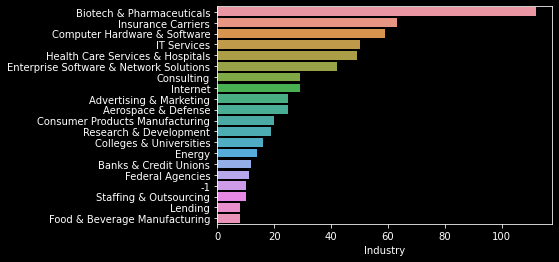

grap_for company_txt: total = 20


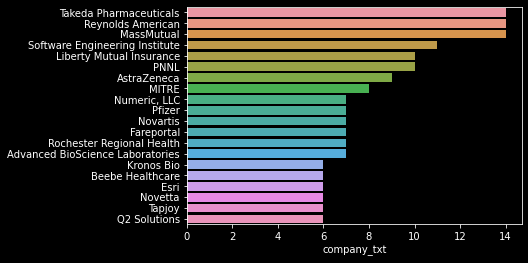

grap_for job_state: total = 20


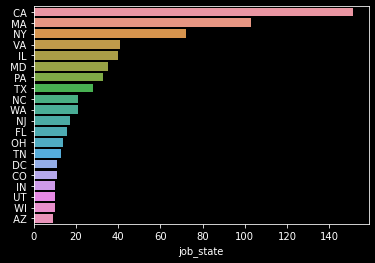

In [22]:
for category in df[['Location', 'Headquarters','Industry','company_txt', 'job_state']].columns:
    cat_num = df[category].value_counts()[:20]
    print("grap_for %s: total = %d"%(category, len(cat_num)))
    sns.barplot(x=cat_num, y=cat_num.index)
    plt.show()

[392, 167, 176, 388, 40, 380] ['python_yn', 'spark_yn', 'aws_yn', 'excel_yn', 'nlp_yn', 'sql_yn']


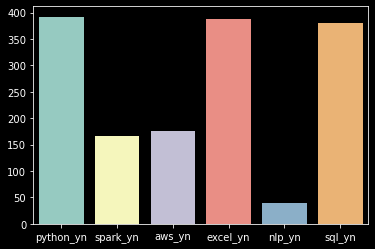

In [23]:
data = []
name = []

for category in df[['python_yn', 'spark_yn', 'aws_yn','excel_yn', 'nlp_yn', 'sql_yn']].columns:
    data.append(df[category].value_counts()[1])
    name.append(category)

print(data, name)

sns.barplot(x=name, y=data)
plt.show()

In [24]:
pd.pivot_table(df, index= ["job_smp","seniority"], values="avarage_salary")
# Na : research scientisct, etc

avarage_salary
job_smp          seniority                
analyst          junior          53.250000
                 na              61.308219
                 senior          79.092593
data engineer    na              96.701220
                 senior         124.689189
data scientist   junior         106.500000
                 na             107.043011
                 senior         138.956522
director         na             168.607143
machine learning na             119.133333
                 senior         142.071429
manager          na              84.022727
na               na              73.988189
                 senior         109.061404

In [25]:
pd.pivot_table(df, index= "job_state", values="avarage_salary").sort_values("avarage_salary", ascending= False)

,avarage_salary
job_state,
CA,123.619205
IL,116.662500
DC,110.181818
Santa Fe Springs,107.500000
MA,106.281553
NJ,104.558824
MI,100.250000
RI,100.000000
NY,98.652778


In [26]:
pd.options.display.max_rows
pd.set_option("display.max_rows", None)
pd.pivot_table(df, index=["job_state", "job_smp"], values="avarage_salary", aggfunc="count").sort_values("job_state", ascending=False)

avarage_salary
job_state        job_smp                         
Santa Fe Springs data scientist                 1
 WI              na                             4
                 data scientist                 3
                 analyst                        3
 WA              na                             1
                 data scientist                17
                 analyst                        3
 VA              na                             5
                 machine learning               2
                 data scientist                18
                 data engineer                 10
                 analyst                        6
 UT              data engineer                  3
                 analyst                        4
                 data scientist                 3
 TX              na                             7
                 data scientist                13
                 data engineer                  8
 TN              data scientist                 1
                 data engineer                 10
                 analyst                        2
 SC              na                             1
 RI              analyst                        1
 PA              machine learning               7
                 analyst                        8
                 data scientist                 6
                 data engineer                  1
                 manager                        3
                 na                             8
 OR              data scientist                 3
                 data engineer                  1
 OH              na                             3
                 data scientist                 7
                 analyst                        4
 NY              na                            12
                 machine learning               2
                 data scientist                40
                 data engineer                  4
                 analyst                       14
 NM              data scientist                 3
 NJ              data scientist                 4
                 analyst                        6
                 data engineer                  2
                 manager                        2
                 director                       2
                 na                             1
 NE              na                             4
 NC              na                            12
                 data scientist                 3
                 data engineer                  6
 MO              na                             3
                 manager                        1
                 data scientist                 3
                 analyst                        2
 MN              data engineer                  1
                 analyst                        1
 MI              manager                        2
                 data scientist                 4
 MD              na                            16
                 data scientist                13
                 data engineer                  3
                 analyst                        3
 MA              na                            46
                 manager                        5
                 director                       6
                 data scientist                30
                 data engineer                 12
                 analyst                        4
 LA              analyst                        1
                 data engineer                  2
                 na                             1
 KY              na                             4
                 data scientist                 2
 KS              machine learning               3
 IN              na                             4
                 data scientist                 2
                 data engineer                  4
 IL              analyst                        3
                 na                

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary',
       'avarage_salary', 'company_txt', 'job_state', 'same_state',
       'company_age', 'python_yn', 'rstudio_yn', 'spark_yn', 'aws_yn',
       'excel_yn', 'nlp_yn', 'sql_yn', 'job_smp', 'seniority', 'desc_length',
       'num_com'],
      dtype='object')

In [28]:
df_pilots = df[['Revenue', 'Industry', 'Sector', 'num_com','python_yn', 'Rating', 'avarage_salary']]

In [29]:
for i in df_pilots.columns:
    if i == 'avarage_salary':
        break
    else:
        print(pd.pivot_table(df_pilots, index=i, values='avarage_salary').sort_values('avarage_salary', ascending = False))

avarage_salary
Revenue                                         
$5 to $10 million (USD)               126.111111
$1 to $5 million (USD)                119.312500
-1                                    117.500000
$10+ billion (USD)                    115.165323
Less than $1 million (USD)            108.625000
$1 to $2 billion (USD)                104.533333
Unknown / Non-Applicable              104.310345
$50 to $100 million (USD)             100.565217
$10 to $25 million (USD)              100.359375
$2 to $5 billion (USD)                 94.730769
$5 to $10 billion (USD)                94.184211
$500 million to $1 billion (USD)       86.991228
$100 to $500 million (USD)             83.153846
$25 to $50 million (USD)               82.837500
                                          avarage_salary
Industry                                                
Other Retail Stores                           163.500000
Motion Picture Production & Distribution      146.000000
Financial Analytics & 

In [30]:
df.to_csv("data_eda.csv", index=False)